In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import transforms
import matplotlib.pyplot as plt

# Define AlexNet model
class AlexNet(nn.Module):
    def __init__(self, num=10):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(96, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=1),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(32*12*12, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, num),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(-1, 32*12*12)
        x = self.classifier(x)
        return x

# Set up the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = MNIST(root='./data', train=True, transform=transform, download=True)

# Define the number of samples for training and validation
total_samples = len(mnist_dataset)
train_percentage = 0.8
train_size = int(total_samples * train_percentage)
val_size = total_samples - train_size

# Create indices for training and validation sets
indices = list(range(total_samples))
train_indices, val_indices = random_split(indices, [train_size, val_size])

# Create Subset datasets using the indices
train_dataset = Subset(mnist_dataset, train_indices)
val_dataset = Subset(mnist_dataset, val_indices)

# Create DataLoader for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize your AlexNet model and move it to the appropriate device
model = AlexNet(num=10).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
train_loss_history = []
val_loss_history = []
train_accuracy_history = []
val_accuracy_history = []

num_epochs = 20


In [11]:

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate and store accuracy and loss for both training and validation
    avg_train_loss = running_train_loss / len(train_loader)
    avg_val_loss = running_val_loss / len(val_loader)
    train_accuracy = 100.0 * correct_train / total_train
    val_accuracy = 100.0 * correct_val / total_val

    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)
    train_accuracy_history.append(train_accuracy)
    val_accuracy_history.append(val_accuracy)

    # Print progress
    print(f'Epoch {epoch + 1}/{num_epochs}:\t'
          f'Train Loss: {avg_train_loss:.4f}\tTrain Acc: {train_accuracy:.2f}%\t'
          f'Val Loss: {avg_val_loss:.4f}\tVal Acc: {val_accuracy:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'saved_model.pth')
print("Model saved at: saved_model.pth")


Epoch 1/20:	Train Loss: 1.3620	Train Acc: 49.90%	Val Loss: 0.1162	Val Acc: 96.32%
Epoch 2/20:	Train Loss: 0.1084	Train Acc: 96.59%	Val Loss: 0.0524	Val Acc: 98.47%
Epoch 3/20:	Train Loss: 0.0678	Train Acc: 97.98%	Val Loss: 0.0452	Val Acc: 98.68%
Epoch 4/20:	Train Loss: 0.0502	Train Acc: 98.48%	Val Loss: 0.0403	Val Acc: 98.81%
Epoch 5/20:	Train Loss: 0.0411	Train Acc: 98.70%	Val Loss: 0.0419	Val Acc: 98.71%
Epoch 6/20:	Train Loss: 0.0381	Train Acc: 98.76%	Val Loss: 0.0353	Val Acc: 98.97%
Epoch 7/20:	Train Loss: 0.0337	Train Acc: 99.00%	Val Loss: 0.0302	Val Acc: 99.08%
Epoch 8/20:	Train Loss: 0.0278	Train Acc: 99.08%	Val Loss: 0.0301	Val Acc: 99.12%
Epoch 9/20:	Train Loss: 0.0258	Train Acc: 99.21%	Val Loss: 0.0276	Val Acc: 99.15%
Epoch 10/20:	Train Loss: 0.0218	Train Acc: 99.29%	Val Loss: 0.0342	Val Acc: 98.99%
Epoch 11/20:	Train Loss: 0.0208	Train Acc: 99.36%	Val Loss: 0.0266	Val Acc: 99.22%
Epoch 12/20:	Train Loss: 0.0181	Train Acc: 99.41%	Val Loss: 0.0289	Val Acc: 99.15%
Epoch 13/20:	

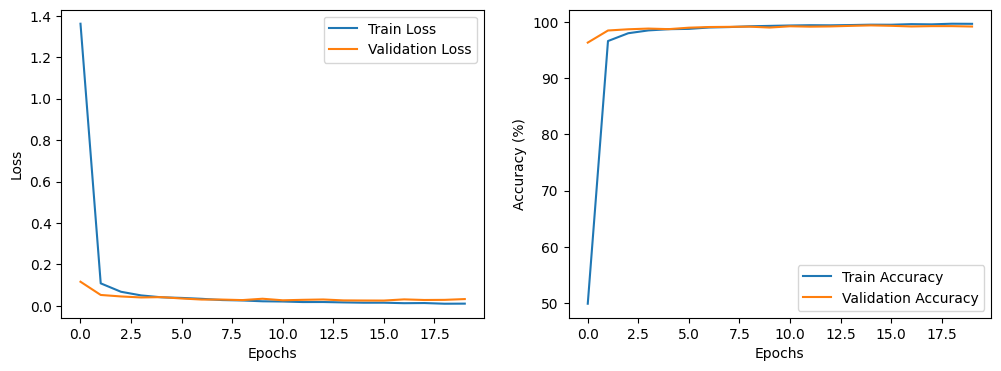

In [12]:

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Train Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [13]:
# Function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()
    running_test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_test_loss += loss.item()
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    avg_test_loss = running_test_loss / len(test_loader)
    test_accuracy = 100.0 * correct_test / total_test

    print(f'Test Loss: {avg_test_loss:.4f}\tTest Accuracy: {test_accuracy:.2f}%')

# Load the pre-trained model
model = AlexNet(num=10).to(device)
model.load_state_dict(torch.load('saved_model.pth'))
model.eval()

# Load the MNIST test dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_indices = list(range(len(mnist_test_dataset)))
test_dataset = Subset(mnist_test_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate the model on the test set
evaluate_model(model, test_loader, criterion)

Test Loss: 0.0272	Test Accuracy: 99.31%
